In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_autos=pd.read_csv('argentina_cars.csv')

In [33]:
df_autos.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [34]:
df_autos.shape

(510, 12)

## Cual es el precio promedio de cada marca?

In [35]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [36]:
promedio_x_marca=df_autos.groupby('brand')['money'].mean().reset_index()

In [37]:
promedio_x_marca['money']=promedio_x_marca['money'].round(2)

In [38]:
promedio_x_marca

,brand,money
0,Audi,2789700.00
1,BMW,699606.92
2,Baic,5780000.00
3,Chery,3300000.00
4,Chevrolet,3737886.27
5,Citroën,3393640.62
6,DS,10359900.00
7,Dodge,7382500.00
8,Fiat,3081068.00
9,Ford,4423521.05


## que body_type tienen los precios mas altos?

In [39]:
precios_x_body_type=df_autos.groupby('body_type')['money'].sum().reset_index()

In [40]:
precios_x_body_type=precios_x_body_type.sort_values(by='money',ascending=False)

In [41]:
precios_x_body_type

,body_type,money
8,SUV,673592538
3,Hatchback,555291976
9,Sedán,348859787
6,Pick-Up,317440578
5,Monovolumen,68923000
2,Furgón,35169700
4,Minivan,9250000
0,Coupé,6698490
7,Rural,5360000
1,Crossover,2450000


In [42]:
df_autos.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [43]:
df_autos['motor'].fillna('1.5',inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_17676\1976221768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_autos['motor'].fillna('1.5',inplace=True)


In [44]:
df_autos['motor'].value_counts()

motor
1.6              163
2.0               78
1.4               54
1.5               50
1.8               46
2.4               19
2.8               15
1.2               12
1.0               10
3.0               10
2.5                8
5.7                6
1.3                5
3.2                5
2.2                4
3.6                4
2.1                3
2.3                3
2                  3
3                  2
5.2                2
1.6 MSI Nafta      1
TURBO              1
3.5                1
TOYOTA 2.8         1
4.4                1
2.8tdi 223cv       1
3.0 TD             1
6.4                1
Name: count, dtype: int64

In [46]:
df_autos.describe()

,money,year,door,kilometres
count,5.100000e+02,510.000000,510.000000,510.000000
mean,3.970188e+06,2016.296078,4.474510,74436.370588
std,2.918454e+06,3.728058,0.761511,46771.799272
min,8.000000e+03,1995.000000,2.000000,500.000000
25%,2.312500e+06,2014.000000,4.000000,43000.000000
50%,3.489900e+06,2017.000000,5.000000,65750.000000
75%,5.237500e+06,2019.000000,5.000000,99100.000000
max,1.429900e+07,2022.000000,5.000000,335000.000000


In [48]:
datos_numericos=df_autos.select_dtypes(include='number')

In [49]:
datos_numericos

,money,year,door,kilometres
0,10350000,2022,5.0,500
1,10850000,2022,5.0,500
2,35500,2022,5.0,500
3,19000,2022,5.0,550
4,5800000,2019,4.0,9000
...,...,...,...,...
505,5250000,2018,5.0,52000
506,46000,2019,4.0,49000
507,3960000,2017,5.0,75358
508,44900,2019,4.0,57500


In [50]:
matrix_corr=datos_numericos.corr()

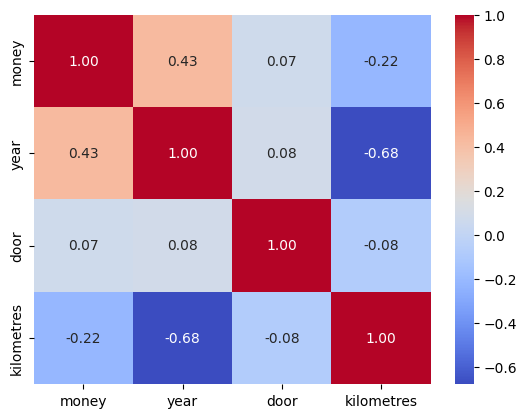

In [51]:
sns.heatmap(matrix_corr,annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### hay una correlacion entre año y la plata. vamos a investigar mas esa correlacion

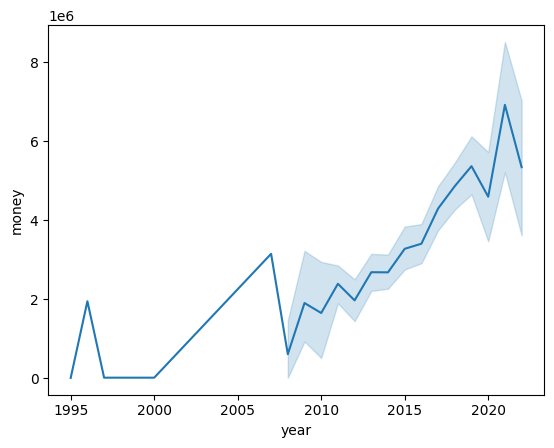

In [52]:
sns.lineplot(data=datos_numericos,x='year',y='money')
plt.show()

### la correlacion vista dice que mientras mas nuevo el auto, mas caro va a salir